# Prediction using Supervised Machine Learning - Linear Regression

## Author : Megha Roy

#### Loading necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading data

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


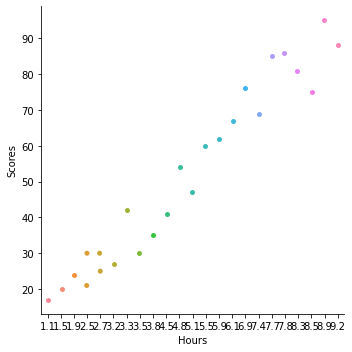

In [5]:
sns.catplot(x="Hours",y="Scores",data= df)

#### Clearly there is a positive relation between no. of hours of study and the scores obtained by the student.

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### The correlation coefficient is 0.97 which shows a strong positive correlation.

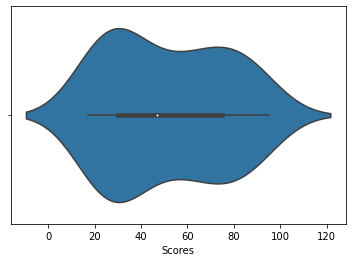

In [7]:
sns.violinplot(df["Scores"])

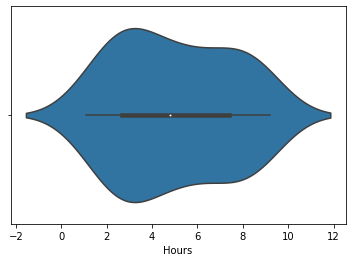

In [8]:
sns.violinplot(df["Hours"])

#### Both variables have similar distribution.

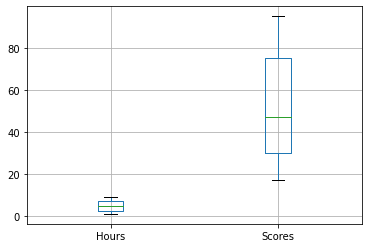

In [9]:
df.boxplot()

#### There are no outliers in the data.

### Linear Regression

In [10]:
import sklearn.model_selection as ms

In [11]:
X = df.drop('Scores',axis=1) 
y = df['Scores'] 

In [12]:
x_train,x_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.2, random_state=0) 

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [14]:
 import sklearn.linear_model as lm

In [15]:
glm=lm.LinearRegression()

In [16]:
glm.fit(x_train,y_train)

LinearRegression()

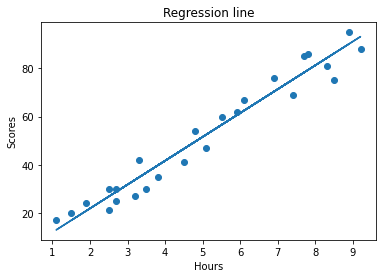

In [17]:
regre_line = glm.intercept_ + X * glm.coef_

plt.scatter(X, y)
plt.plot(X, regre_line)
plt.title("Regression line")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [18]:
y_predict = glm.predict(x_test)

#### Evaluating the model

In [19]:
pd.DataFrame({"Actual": y_test, "Predicted": y_predict})

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [20]:
glm.score(x_test,y_test)

0.9454906892105354

In [21]:
glm.score(x_train,y_train)

0.9515510725211552

In [22]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('R2 value: ', r2_score(y_test, y_predict))

Mean Absolute Error: 4.183859899002982
R2 value:  0.9454906892105354


#### Predicted score when hours = 9.25

In [24]:
hours = 9.25
glm.predict([[hours]])

array([93.69173249])

#### If the no. of hours is 9.25 then the student is likely to core 93.69